# 시각화 연습
- figure : 그래프를 그릴 공간(도화지) / ax(axes) : 그 공간 중 지금 내가 사용할 부분

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#OS 종류에 따라서 한글 사용할 수 있도록 해줌
import os
if os.name == 'nt': 
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [11]:
# 색 지정 가능
COLORS = sns.color_palette() 
COLORS

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

In [16]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Box-Plot

<AxesSubplot:>

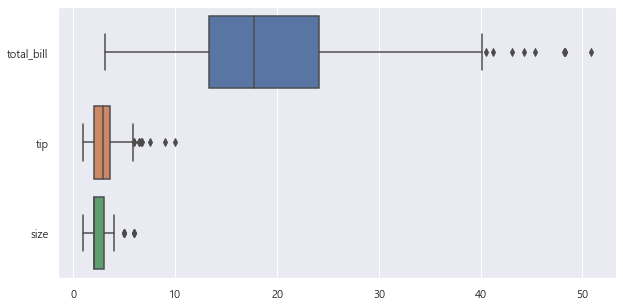

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,orient='h')

Text(0, 0.5, '달러($)')

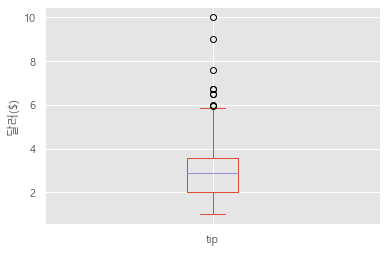

In [13]:
# ax라는 축을 지정해서 그래프 그리기
ax = (data['tip'].plot.box())
ax.set_ylabel('달러($)')

## Bar-Plot
- label과 값을 동시에 줘서 그래프 그리기

<BarContainer object of 4 artists>

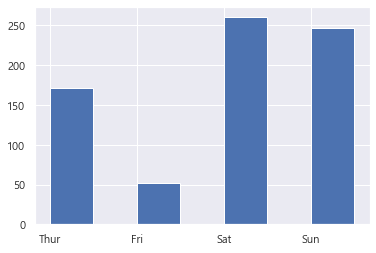

In [20]:
tips_sum_day = data.groupby('day').tip.sum()
label = ['Thur','Fri','Sat','Sun']
plt.bar(label, tips_sum_day, width=0.5, align='edge')

- sns.barplot()
- DataFrame 내에 있는 변수명을 그대로 사용해서 Groupby된 값을 시각화
- hue라는 파라미터를 이용해서 한번 더 구분되어 Groupby된 값을 볼 수도 있음

Text(0.5, 1.0, '성별, 사이즈별 팁')

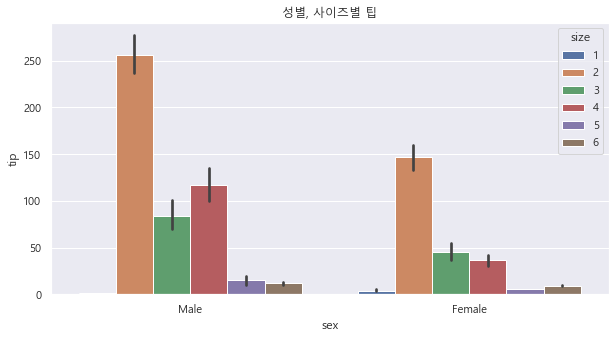

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='sex',y='tip', hue='size', estimator=np.sum)
plt.title("성별, 사이즈별 팁")

## 여러 그래프 그리기

Text(0.5, 1.0, '파이그래프')

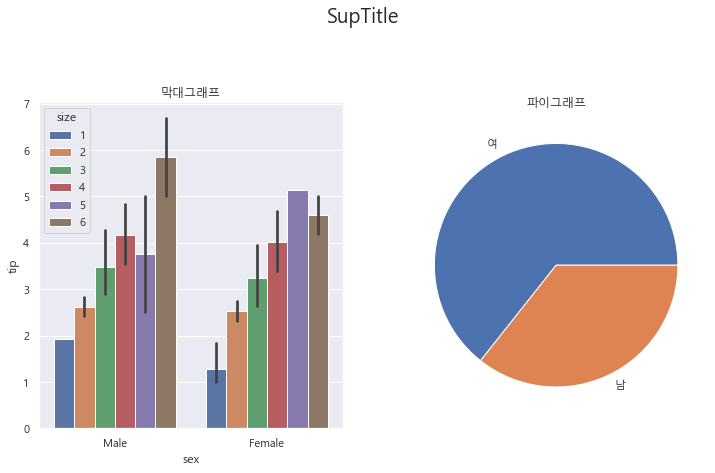

In [57]:
f, a = plt.subplots(1,2, figsize=(12,6))
plt.suptitle('SupTitle', fontsize = 20, y=1.1) # 도화지의 제목, y는 제목의 높낮이 위치
plt.subplot(1,2,1)
sns.barplot(data=data, x='sex',y='tip',hue='size')
plt.title("막대그래프")

plt.subplot(1,2,2)
plt.pie(data['sex'].value_counts(), labels=['여','남'])
plt.title("파이그래프")

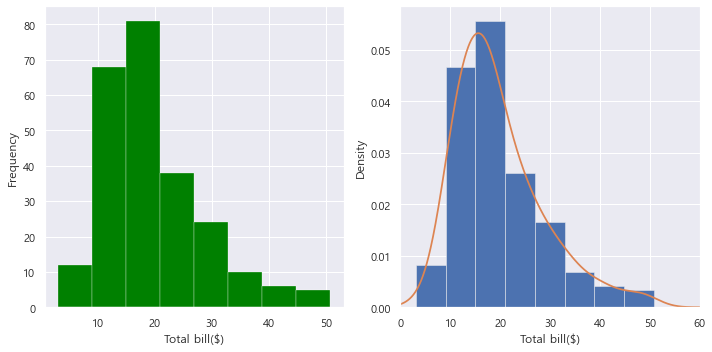

In [58]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

# Histogram
plt.style.use("seaborn")
ax1 = plt.subplot(1,2,1)
ax1 = (data['total_bill']).plot.hist(bins=8, color='green')
ax1.set_xlabel('Total bill($)')

plt.style.use("ggplot")
plt.subplot(1,2,2)
ax2 = data['total_bill'].plot.hist(density=True, xlim=[0,60], bins=8)
data['total_bill'].plot.density(ax=ax2) #이런식으로 원하는 위치에 그래프 추가 가능
data
ax2.set_xlabel('Total bill($)')


plt.tight_layout()
plt.show()

## 그래프 겹쳐서 여러개 그리기

In [73]:
x = np.linspace(0,2,100)
y1 = 0.5*x
y2 = 0.5*x**2
y3 = 0.5*x**3

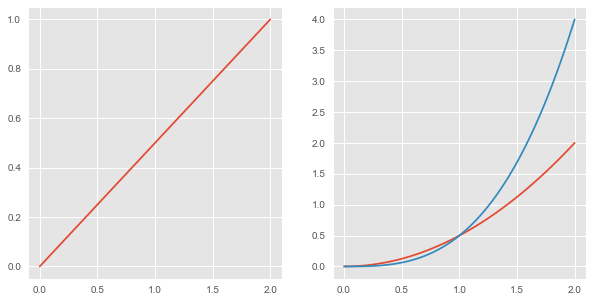

In [81]:
f,a = plt.subplots(1,2, figsize=(10,5))
a = plt.subplot(1,2,1)
plt.plot(x,y1)

a2 = plt.subplot(1,2,2)
plt.plot(x,y2)
plt.plot(x,y3)